# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data.
import numpy as np  # Mengimpor pustaka numpy untuk operasi numerik.
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data.
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi data.
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Mengimpor fungsi untuk membagi data menjadi set pelatihan dan pengujian, serta melakukan pencarian hyperparameter secara acak.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # Mengimpor fungsi untuk penskalaan data (MinMaxScaler) dan encoding data kategorikal (LabelEncoder).
from sklearn.ensemble import RandomForestClassifier  # Mengimpor model Random Forest untuk klasifikasi.
from sklearn.naive_bayes import GaussianNB  # Mengimpor model Naive Bayes Gaussian untuk klasifikasi.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report  # Mengimpor metrik evaluasi untuk model klasifikasi seperti matriks konfusi, akurasi, presisi, recall, F1-score, dan laporan klasifikasi.
from google.colab import drive  # Mengimpor drive dari google.colab untuk mengakses Google Drive.

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Mount Google Drive ke Google Colab agar dapat mengakses file di dalamnya
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Membaca dataset dan menampilkan 5 baris pertama
data = pd.read_csv('/content/drive/MyDrive/Dataset_clustering.csv')
data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
2,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
3,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
4,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menghapus kolom yang tidak diperlukan dari DataFrame 'data'
data = data.drop(columns=['Order_ID','Customer_ID','Order_Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75948 entries, 0 to 75947
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  75948 non-null  object 
 1   Product        75948 non-null  object 
 2   Category       75948 non-null  object 
 3   Unit_Price     75948 non-null  float64
 4   Quantity       75948 non-null  float64
 5   Discount       75948 non-null  float64
 6   Total_Price    75948 non-null  float64
 7   Region         75948 non-null  object 
 8   Cluster        75948 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 5.2+ MB


In [5]:
# Mengecek jumlah data duplikat
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  32752


In [6]:
# Menghapus duplikasi baris dalam DataFrame 'data'
data = data.drop_duplicates(ignore_index=True)

print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])
y = data['Cluster']

# Tampilkan 5 baris pertama X
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen


In [8]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode kolom kategorikal
for column in categorical_columns:
    X[column] = le.fit_transform(X[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,5,2,1.04,7.0,0.00,7.28,4
1,0,32,3,0.71,46.0,0.10,29.39,13
2,0,20,2,2.68,30.0,0.05,76.38,14
3,1,29,3,0.91,3.0,0.00,2.73,6
4,1,2,0,1.41,4.0,0.00,5.64,4


In [9]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(34556, 8), y_train=(34556,)
Test set shape: X_test=(8640, 8), y_test=(8640,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [10]:
# Model Training
rf = RandomForestClassifier(random_state=69).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.
*   **Random Forest** merupakan algoritma *ensemble learning* yang membangun sejumlah pohon keputusan pada sampel data yang berbeda dan menggabungkan hasil prediksi dari setiap pohon untuk meningkatkan akurasi dan stabilitas model, mengurangi *overfitting*, serta menangani data kompleks dengan baik.

*   **Naive Bayes** adalah algoritma klasifikasi probabilistik yang mengasumsikan fitur-fitur data bersifat independen satu sama lain, serta mengikuti distribusi normal (Gaussian), dan menggunakan teorema Bayes untuk menghitung probabilitas kelas berdasarkan nilai fitur-fitur yang diberikan.



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Model Random Forest:
Accuracy: 0.9984
F1-Score: 0.9984
Precision: 0.9984
Recall: 0.9984
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      4774
           1     0.9975    0.9950    0.9962      1196
           2     0.9970    0.9993    0.9981      1345
           3     0.9947    0.9947    0.9947      1325

    accuracy                         0.9984      8640
   macro avg     0.9973    0.9972    0.9973      8640
weighted avg     0.9984    0.9984    0.9984      8640

Confusion Matrix - Random Forest:
 [[4774    0    0    0]
 [   0 1190    0    6]
 [   0    0 1344    1]
 [   0    3    4 1318]]


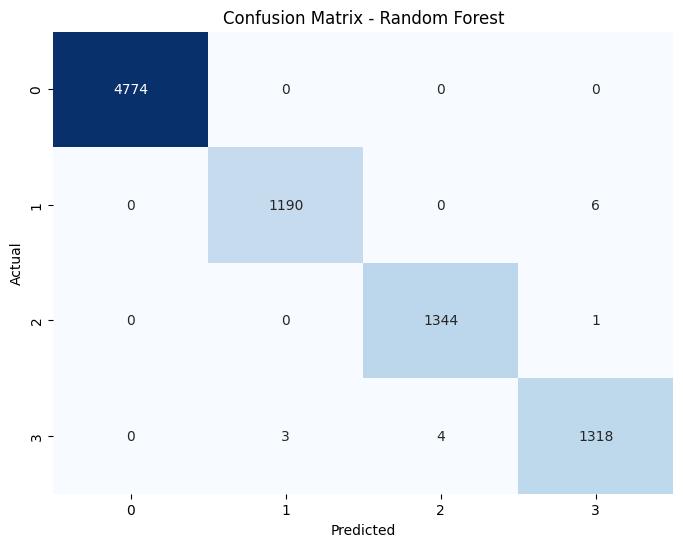

In [11]:
# 1. Random Forest
y_pred_rf = rf.predict(X_test)

# Evaluasi model Random Forest
print("Evaluasi Model Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(classification_report(y_test, y_pred_rf, digits=4))

# Cetak confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:\n", cm_rf)

# Visualisasi confusion matrix - Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Evaluasi Model Naive Bayes:
Accuracy: 0.9830
F1-Score: 0.9830
Precision: 0.9830
Recall: 0.9830
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      4774
           1     0.9800    0.9849    0.9825      1196
           2     0.9572    0.9651    0.9611      1345
           3     0.9503    0.9381    0.9442      1325

    accuracy                         0.9830      8640
   macro avg     0.9719    0.9720    0.9719      8640
weighted avg     0.9830    0.9830    0.9830      8640

Confusion Matrix - Naive Bayes:
 [[4774    0    0    0]
 [   0 1178    0   18]
 [   0    0 1298   47]
 [   0   24   58 1243]]


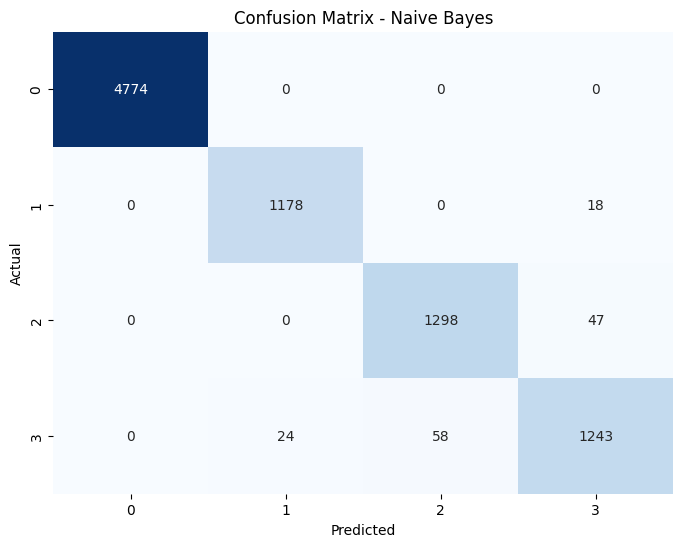

In [12]:
# 2. Naive Bayes
y_pred_nb = nb.predict(X_test)

# Evaluasi model Naive Bayes
print("Evaluasi Model Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(classification_report(y_test, y_pred_nb, digits=4))

# Cetak confusion matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix - Naive Bayes:\n", cm_nb)

# Visualisasi confusion matrix - Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [13]:
# Buat DataFrame untuk perbandingan hasil evaluasi
evaluation_results = pd.DataFrame({
    'Model': ['Random Forest', 'Naive Bayes'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_nb)],
    'Precision': [precision_score(y_test, y_pred_rf, average='weighted'), precision_score(y_test, y_pred_nb, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_rf, average='weighted'), recall_score(y_test, y_pred_nb, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_nb, average='weighted')]
})

# Tampilkan DataFrame hasil evaluasi
print("Perbandingan Hasil Evaluasi Model:")
evaluation_results

Perbandingan Hasil Evaluasi Model:


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.998380,0.998380,0.998380,0.998379
1,Naive Bayes,0.982986,0.982957,0.982986,0.982962


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [14]:
# 1. Random Forest Tuning
# Menentukan distribusi parameter untuk Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Membuat RandomizedSearchCV untuk Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=69),
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=69,
    n_jobs=-1
)

# Melatih RandomizedSearchCV pada Random Forest
rf_random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan akurasi terbaik untuk Random Forest
print("Best Random Forest Hyperparameters:", rf_random_search.best_params_)
print("Best Random Forest Accuracy:", rf_random_search.best_score_)

# 2. Naive Bayes Tuning
# Menentukan distribusi parameter untuk Naive Bayes
nb_param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Membuat RandomizedSearchCV untuk Naive Bayes
nb_random_search = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=nb_param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=69,
    n_jobs=-1
)

# Melatih RandomizedSearchCV pada Naive Bayes
nb_random_search.fit(X_train, y_train)

# Menampilkan hiperparameter terbaik dan akurasi terbaik untuk Naive Bayes
print("Best Naive Bayes Hyperparameters:", nb_random_search.best_params_)
print("Best Naive Bayes Accuracy:", nb_random_search.best_score_)


Best Random Forest Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best Random Forest Accuracy: 0.9989292683564045
Best Naive Bayes Hyperparameters: {'var_smoothing': np.float64(2.848035868435799e-07)}
Best Naive Bayes Accuracy: 0.9848651313057015


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Model Random Forest Setelah Tuning:
Accuracy: 0.9988
F1-Score: 0.9988
Precision: 0.9988
Recall: 0.9988
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      4774
           1     0.9992    0.9967    0.9979      1196
           2     0.9963    1.0000    0.9981      1345
           3     0.9970    0.9955    0.9962      1325

    accuracy                         0.9988      8640
   macro avg     0.9981    0.9980    0.9981      8640
weighted avg     0.9988    0.9988    0.9988      8640

Confusion Matrix - Random Forest (Tuned):
 [[4774    0    0    0]
 [   0 1192    0    4]
 [   0    0 1345    0]
 [   0    1    5 1319]]


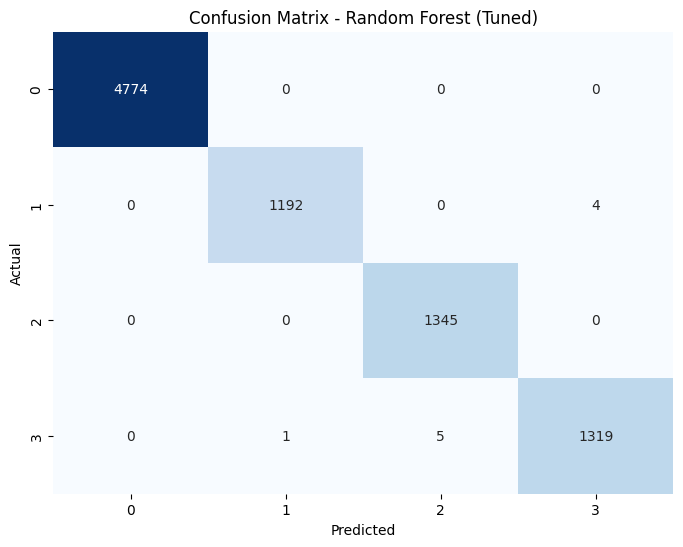

In [15]:
# 1. Random Forest Tuned
# Gunakan model dengan hyperparameter terbaik dari Random Forest
best_rf_model = rf_random_search.best_estimator_

# Lakukan prediksi dengan model terbaik
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluasi model Random Forest setelah tuning
print("Evaluasi Model Random Forest Setelah Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_tuned, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_tuned, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_tuned, average='weighted'):.4f}")
print(classification_report(y_test, y_pred_rf_tuned, digits=4))

# Cetak confusion matrix untuk Random Forest setelah tuning
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
print("Confusion Matrix - Random Forest (Tuned):\n", cm_rf_tuned)

# Visualisasi confusion matrix Random Forest setelah tuning
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Evaluasi Model Naive Bayes Setelah Tuning:
Accuracy: 0.9830
F1-Score: 0.9830
Precision: 0.9830
Recall: 0.9830
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      4774
           1     0.9800    0.9849    0.9825      1196
           2     0.9572    0.9651    0.9611      1345
           3     0.9503    0.9381    0.9442      1325

    accuracy                         0.9830      8640
   macro avg     0.9719    0.9720    0.9719      8640
weighted avg     0.9830    0.9830    0.9830      8640

Confusion Matrix - Naive Bayes (Tuned):
 [[4774    0    0    0]
 [   0 1178    0   18]
 [   0    0 1298   47]
 [   0   24   58 1243]]


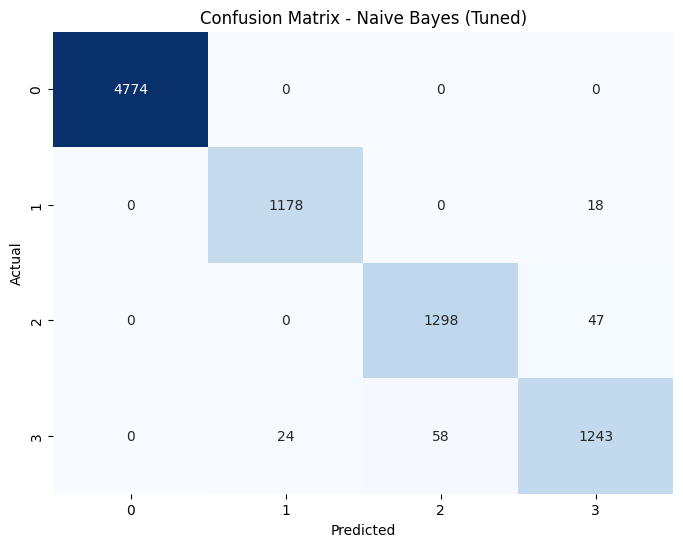

In [16]:
# 2. Naive Bayes Tuned
# Gunakan model dengan hyperparameter terbaik dari Naive Bayes
best_nb_model = nb_random_search.best_estimator_

# Lakukan prediksi dengan model terbaik
y_pred_nb_tuned = best_nb_model.predict(X_test)

# Evaluasi model Naive Bayes setelah tuning
print("Evaluasi Model Naive Bayes Setelah Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb_tuned, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb_tuned, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb_tuned, average='weighted'):.4f}")
print(classification_report(y_test, y_pred_nb_tuned, digits=4))

# Cetak confusion matrix untuk Naive Bayes setelah tuning
cm_nb_tuned = confusion_matrix(y_test, y_pred_nb_tuned)
print("Confusion Matrix - Naive Bayes (Tuned):\n", cm_nb_tuned)

# Visualisasi confusion matrix Naive Bayes setelah tuning
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Naive Bayes (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# Buat DataFrame untuk perbandingan hasil evaluasi setelah tuning
evaluation_results_tuned = pd.DataFrame({
    'Model': ['Random Forest (Tuned)', 'Naive Bayes (Tuned)'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf_tuned), accuracy_score(y_test, y_pred_nb_tuned)],
    'Precision': [precision_score(y_test, y_pred_rf_tuned, average='weighted'), precision_score(y_test, y_pred_nb_tuned, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_rf_tuned, average='weighted'), recall_score(y_test, y_pred_nb_tuned, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred_rf_tuned, average='weighted'), f1_score(y_test, y_pred_nb_tuned, average='weighted')]
})

# Tampilkan DataFrame hasil evaluasi setelah tuning
print("Perbandingan Hasil Evaluasi Model Setelah Tuning:")
evaluation_results_tuned

Perbandingan Hasil Evaluasi Model Setelah Tuning:


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest (Tuned),0.998843,0.998844,0.998843,0.998842
1,Naive Bayes (Tuned),0.982986,0.982957,0.982986,0.982962


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [18]:
# Menggabungkan dua DataFrame dan menukar baris pada DataFrame untuk menampilkan perbandingan yang lebih baik
df_merged = pd.concat([evaluation_results, evaluation_results_tuned], ignore_index=True)
df_merged.iloc[[1, 2]] = df_merged.iloc[[2, 1]].values
df_merged

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.998380,0.998380,0.998380,0.998379
1,Random Forest (Tuned),0.998843,0.998844,0.998843,0.998842
2,Naive Bayes,0.982986,0.982957,0.982986,0.982962
3,Naive Bayes (Tuned),0.982986,0.982957,0.982986,0.982962


Berdasarkan kode dan hasil evaluasi yang diberikan, berikut rangkuman tentang identifikasi kelemahan model:

**1. Precision atau Recall Rendah untuk Kelas Tertentu:**

* Berdasarkan hasil evaluasi, tidak ada indikasi precision atau recall yang rendah secara signifikan untuk kelas tertentu pada kedua model (Random Forest dan Naive Bayes).
* Kedua model menunjukkan kinerja yang cukup baik dalam hal precision dan recall secara keseluruhan.
* Namun, model Naive Bayes memiliki nilai precision dan recall yang sedikit lebih rendah dibandingkan dengan Random Forest, terutama setelah tuning. Hal ini mungkin menunjukkan bahwa Random Forest lebih baik dalam menangani kompleksitas data dan distribusi kelas yang ada.

**2. Overfitting atau Underfitting:**

* Tidak ada indikasi kuat terjadinya overfitting pada model, terutama pada Random Forest yang telah dituning. Model tetap mempertahankan performa yang baik di semua metrik, menunjukkan bahwa tidak ada kecenderungan model terlalu menyesuaikan dengan data latih hingga kehilangan kemampuan generalisasi.
* Tidak ada tanda-tanda underfitting karena semua model menunjukkan akurasi, presisi, recall, dan F1-score yang cukup tinggi. Jika model mengalami underfitting, biasanya metrik performa akan lebih rendah.

**Kesimpulan:**

* Secara keseluruhan, kedua model (Random Forest dan Naive Bayes) menunjukkan performa yang baik dalam melakukan klasifikasi berdasarkan hasil clustering.
* Random Forest cenderung menjadi model yang lebih unggul dibandingkan Naive Bayes, terutama setelah tuning parameter.
* Model tidak menunjukkan tanda-tanda overfitting atau underfitting.
